In [61]:
import requests
# If you are using a Jupyter notebook, uncomment the following line.
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import json
from PIL import Image
from io import BytesIO
import os;
import sys;
import json

In [62]:

# Add your Computer Vision subscription key and endpoint to your environment variables.
# if 'COMPUTER_VISION_SUBSCRIPTION_KEY' in os.environ:
#     subscription_key = os.environ['COMPUTER_VISION_SUBSCRIPTION_KEY']
# else:
#     print("\nSet the COMPUTER_VISION_SUBSCRIPTION_KEY environment variable.\n**Restart your shell or IDE for changes to take effect.**")
#     sys.exit()

# if 'COMPUTER_VISION_ENDPOINT' in os.environ:
#     endpoint = os.environ['COMPUTER_VISION_ENDPOINT']

subscription_key = "9f4c7e5aca7541868c870e9775a078d2"
ocr_url = "https://westcentralus.api.cognitive.microsoft.com/" + "vision/v2.1/ocr"

image_path = "/Users/weishi/Desktop/madhack/Xbuyer/Training_samples/Receipt_1.jpg"
# Read the image into a byte array
image_data = open(image_path, "rb").read()

In [63]:
# Set Content-Type to octet-stream
headers = {'Ocp-Apim-Subscription-Key': subscription_key, 'Content-Type': 'application/octet-stream'}
params = {'language': 'unk', 'detectOrientation': 'true'}
# put the byte array into your post request
response = requests.post(ocr_url, headers=headers, params=params, data = image_data)
response.raise_for_status()

analysis = response.json()

In [64]:
print(analysis)

{'language': 'en', 'textAngle': 0.0, 'orientation': 'Up', 'regions': [{'boundingBox': '517,15,124,20', 'lines': [{'boundingBox': '517,15,124,20', 'words': [{'boundingBox': '517,15,19,20', 'text': 'RI'}, {'boundingBox': '590,17,51,17', 'text': '13:15'}]}]}, {'boundingBox': '54,244,444,273', 'lines': [{'boundingBox': '181,244,195,27', 'words': [{'boundingBox': '181,244,40,25', 'text': 'CNR'}, {'boundingBox': '239,246,137,25', 'text': '[ETCHWORTH'}]}, {'boundingBox': '225,281,192,26', 'words': [{'boundingBox': '225,281,67,25', 'text': 'COIJIS'}, {'boundingBox': '308,282,109,25', 'text': 'THIBAULT'}]}, {'boundingBox': '280,317,191,25', 'words': [{'boundingBox': '280,317,37,24', 'text': '021'}, {'boundingBox': '336,318,40,24', 'text': '558'}, {'boundingBox': '392,317,79,25', 'text': '0120/1'}]}, {'boundingBox': '195,351,303,27', 'words': [{'boundingBox': '195,351,40,24', 'text': 'VAT'}, {'boundingBox': '252,352,40,24', 'text': 'REG'}, {'boundingBox': '309,352,35,25', 'text': 'NO:'}, {'bound

In [65]:
# Extract the word bounding boxes and text.
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
textArray = []
i = 0
for line in line_infos:
    for word_metadata in line:
        textArray.append("")
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
            textArray[i] = textArray[i] + (word_info['text']) + " "
        i = i+1

textArray

['RI 13:15 ',
 'CNR [ETCHWORTH ',
 'COIJIS THIBAULT ',
 '021 558 0120/1 ',
 'VAT REG NO: 4590203971 ',
 'REG NO: WCP021920 ',
 'INVOICE ',
 'DELUXE CHEESE ROLLS ',
 '4 ',
 'FORRELLE PEARS ',
 '22.99 R ',
 'SPAR CARR VTI ',
 'SPAR F/CRM ',
 'F/L BANANAS ',
 'FLAMINKVLEI EGGS LAR ',
 'GN STRAWBERRIES ',
 'TOTAL ',
 'TENDERED Credit ',
 '4.30 ',
 '146.14 ',
 'FOR 8 ITEMS ',
 '146.14 ',
 '1 kg ',
 'IIS ',
 'IKG ',
 'I .5KG ',
 '40012 ',
 'VAT rate ',
 '0.00% ',
 'Carc ',
 'excl . ',
 '62.97 ',
 '72,32 ',
 'TAX ',
 '0.00 ',
 '10,85 ',
 '17.20 ',
 '20.40 ',
 '14.99 A ',
 '29.99 A ',
 '17 , ',
 '14.99 * ',
 '29.99 * ',
 'incl . ',
 '62.97 * ',
 '83.17 A ',
 'SLIP / TILL / CASHIER / DATE / TIME ',
 '06.10.18 ',
 'OOI ',
 '41 ',
 '8554 ',
 'CASHIER NAME: PHUMEZA ',
 'THANK YOU FOR YOUR SUPPORT ',
 'SLEASE AND ',
 'PERISHABLES - FREEZE AT OWN RISK ',
 'NOXETIJRNS A CASWSLIP ']

(-0.5, 669.5, 1388.5, -0.5)

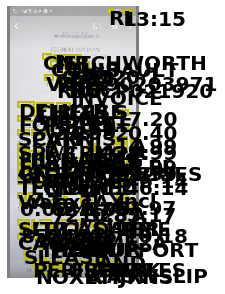

In [66]:
# Display the image and overlay it with the extracted text.
plt.figure(figsize=(5, 5))
image = Image.open(BytesIO(image_data))
ax = plt.imshow(image, alpha=0.5)
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch = Rectangle(origin, bbox[2], bbox[3],
                      fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
plt.axis("off")

In [67]:
Item = []
Date = []

In [68]:
with open('../Backend/database.json') as json_file:
    foodData = json.load(json_file)
    for x in foodData['food']:
        Item.append(x['name'])
        Date.append(x['date'])

In [72]:
Item

['steak',
 'chop',
 'pork',
 'egg',
 'egg',
 'chicken',
 'tuna',
 'fish',
 'bacon',
 'milk',
 'onion',
 'banana',
 'pear',
 'strawberries',
 'burger',
 'catfish',
 'juice',
 'cucumber',
 'tomato',
 'carrot',
 'cheese',
 'waffle',
 'iceberg',
 'celery',
 'romaine',
 'cherries',
 'bean',
 'potato',
 'avocado',
 'salami',
 'bread']

In [73]:
Date

[4,
 4,
 4,
 28,
 28,
 4,
 4,
 3,
 7,
 7,
 30,
 10,
 7,
 3,
 6,
 2,
 60,
 7,
 7,
 28,
 10,
 80,
 9,
 25,
 8,
 6,
 365,
 28,
 5,
 10,
 7]

In [90]:
output = {}
output['food'] = []
for a in textArray:
    b = a.lower()
    for i in range(0, len(Item)):
        if Item[i] in b:
            output['food'].append({
                'name':Item[i],
                'date':Date[i]
            })

output
with open('output.json','w') as outfile:
    json.dump(output, outfile)